# Chess - Data Visualization and Logistic Regression Project 

## Notebook Preparation

In [2]:
# Import Libraries
#System
import os 

#Data Transformation and Modelling
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import datetime as dt

#Visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import scatter_matrix
import seaborn as sns
from IPython.display import set_matplotlib_formats, HTML
from matplotlib.dates import DateFormatter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import colors as mcolors
from pandas.plotting import register_matplotlib_converters
import plotly.express as px
%matplotlib inline
%config InlineBackend.figure_format = 'png'

### Standarizing Visualizations

In [3]:
# default styles
def set_sns_format(width=14, height=8):
    sns.set_theme(palette='pastel', context='notebook',rc={'savefig.dpi':300})
    set_matplotlib_formats('retina')
    matplotlib.rcParams['figure.figsize'] = (width, height)
    return None 
set_sns_format(width=14, height=8)

C:\Users\ssai\AppData\Local\Temp\ipykernel_25128\1719351524.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [4]:
# Adding  datapoints values to line or bar plots

def add_value_labels(ax, typ, spacing=5):
    #This function add the labels in the bar and line plots
    #input the ax to add the labels, the type of plot
    
    space = spacing
    va = 'bottom'
    

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va, fontsize=10)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='center', va=va)

## Dataset Discovery

In [5]:
# Load Dataset
df = pd.read_csv('c:\\Users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\archive\\games.csv')

In [6]:
df.shape # 20058 Rows - 16 Columns

(20058, 16)

In [7]:
df.info() #Columns Name and Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [8]:
#Detect NaN values
df.isna().sum() #The dataset contains 0 NaN Values

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [9]:
#Describe numerical variables.
df.describe() #Created_at and last_move_at are Dates. 

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


In [10]:
# Describe all columns of the Dataset

df.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
count,20058,20058,2.005800e+04,2.005800e+04,20058.000000,20058,20058,20058,20058,20058.000000,20058,20058.000000,20058,20058,20058,20058.000000
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,XRuQPSzH,True,NaN,NaN,NaN,resign,white,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,Van't Kruijs Opening,NaN
freq,5,16155,NaN,NaN,NaN,11147,10001,7721,72,NaN,82,NaN,27,1007,368,NaN
mean,NaN,NaN,1.483617e+12,1.483618e+12,60.465999,NaN,NaN,NaN,NaN,1596.631868,NaN,1588.831987,NaN,NaN,NaN,4.816981
std,NaN,NaN,2.850151e+10,2.850140e+10,33.570585,NaN,NaN,NaN,NaN,291.253376,NaN,291.036126,NaN,NaN,NaN,2.797152
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.477548e+12,1.477548e+12,37.000000,NaN,NaN,NaN,NaN,1398.000000,NaN,1391.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.496010e+12,1.496010e+12,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1562.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503170e+12,1.503170e+12,79.000000,NaN,NaN,NaN,NaN,1793.000000,NaN,1784.000000,NaN,NaN,NaN,6.000000


In [11]:
# Number of unique Categorical Values by column
pd.DataFrame(df.describe(include='all').iloc[1]).dropna()

,unique
id,19113
rated,2
victory_status,4
winner,3
increment_code,400
white_id,9438
black_id,9331
moves,18920
opening_eco,365
opening_name,1477


In [12]:
# Duplicated Rows

print('Number of rows ' + str(df.shape[0]))

print('Number of duplicated rows ' + str(df.duplicated().value_counts()[1]))

#Remove duplicated in the DataFrame
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

print('Number of rows after removing duplicated rows ' + str(df.shape[0]))


Number of rows 20058
Number of duplicated rows 429
Number of rows after removing duplicated rows 19629


In [13]:
# Check Duplicated rowws by subset ()
print('Number of rows ' + str(df.shape[0]))
print('Number of rows by subset: ID, White ID, Black ID Moves and Turns ' + str(df.duplicated(subset=['id', 'white_id', 'black_id', 'moves', 'turns']).value_counts()[1]))
#Remove duplicated in the DataFrame
df.drop_duplicates(subset=['id', 'white_id', 'black_id', 'moves', 'turns'], keep='first', inplace=True, ignore_index=False)
print('Number of rows after removing duplicated rows ' + str(df.shape[0]))


Number of rows 19629
Number of rows by subset: ID, White ID, Black ID Moves and Turns 516
Number of rows after removing duplicated rows 19113


In [14]:
print(f'Number of rows reomved {20058-19113}')

Number of rows reomved 945


## DateTime - Convert columns Created_at & Last_move_at

In [15]:
df.head(2) #Display 2 first rows of the Dataset

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


In [16]:
print('Epoch timestamp: '+str(df['created_at'][2])) #Display the value of the Column created_at in row with index 0

Epoch timestamp: 1504130000000.0


In [17]:
print('Epoch timestamp: '+str(df['last_move_at'][2])) #Display the value of the Column last_move_at in row with index 0

Epoch timestamp: 1504130000000.0


In [18]:
(df['created_at'] == df['last_move_at']).value_counts() #Checking if the values in created_at and last_move_at are the same. 8533 rows have the same created_at and last_move_at as value.

False    10580
True      8533
dtype: int64

In [19]:
df['created_at'] = pd.to_datetime(df['created_at'], unit='ms') #Convert date to YYYY-MM-DD HH:MM:SS format

In [20]:
df['last_move_at'] = pd.to_datetime(df['last_move_at'], unit='ms') #Convert date to YYYY-MM-DD HH:MM:SS format

In [21]:
df.head(2)


,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4


## Column Analysis

### ID

In [22]:
#Checking ID as unique Identifier by Game.
display(df.shape[0]) 
display(df['id'].nunique()) 

19113

19113

### Rated

In [23]:
df['rated'].dtype # True | False Column

dtype('bool')

In [24]:
df['rated'].value_counts()# 16155 Matchs rated | 3903 matches not rated 

True     15467
False     3646
Name: rated, dtype: int64

In [25]:
df['rated'].value_counts(normalize=True) # Perentage of True and False

True     0.80924
False    0.19076
Name: rated, dtype: float64

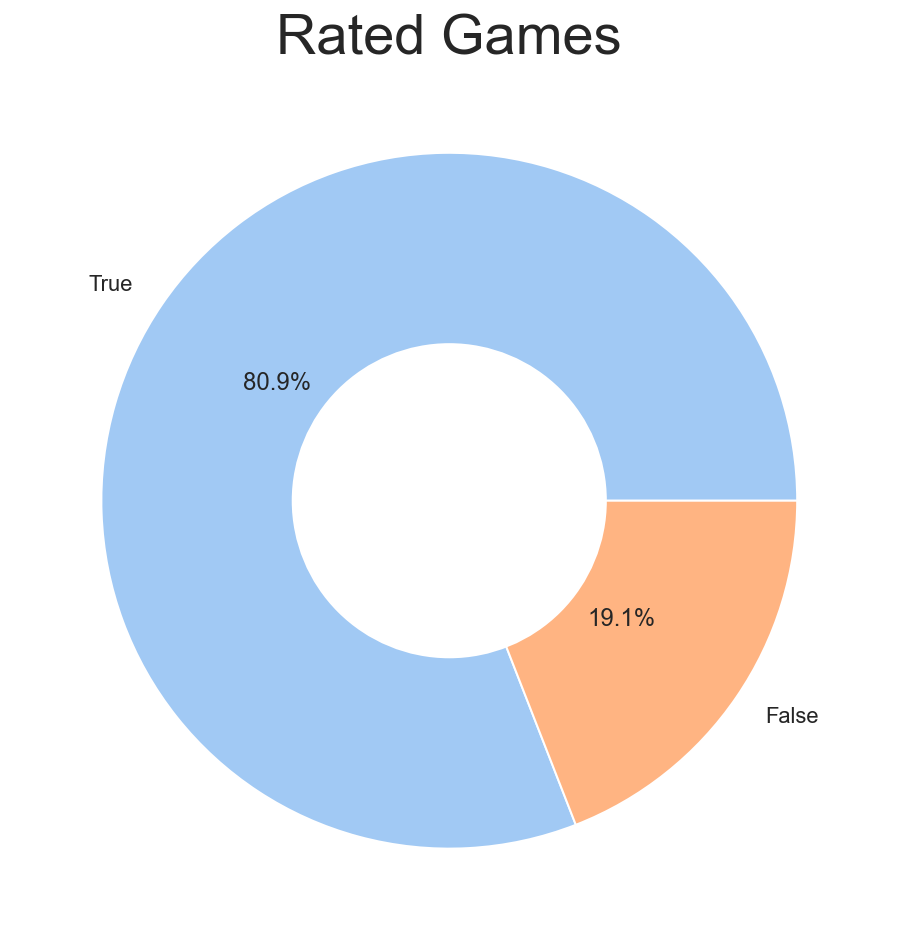

In [26]:
# create data
labels = ['True', 'False']
values = df['rated'].value_counts().to_list()
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.45, color='white')

# Give color names
plt.pie(values, labels=labels, autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Rated Games', fontsize=28)

#Save Plot 
plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//rated_games_percentage.png')

# Show the graph
plt.show()

### created_at

In [27]:
df['created_at'].max() #Last game in the dataset started on 2017-09-04

Timestamp('2017-09-04 02:45:43.790000128')

In [28]:
df['created_at'].min() #First game in the dataset started on 2013-08-17

Timestamp('2013-08-17 20:33:53.172999936')

In [29]:
#Create a separate column for years
df['created_at_year'] = pd.to_datetime(df['created_at']).dt.strftime("%Y")

In [30]:
#Games per year Table
df.groupby(df['created_at_year'])['id'].count()

created_at_year
2013       53
2014     1180
2015     1222
2016     3570
2017    13088
Name: id, dtype: int64

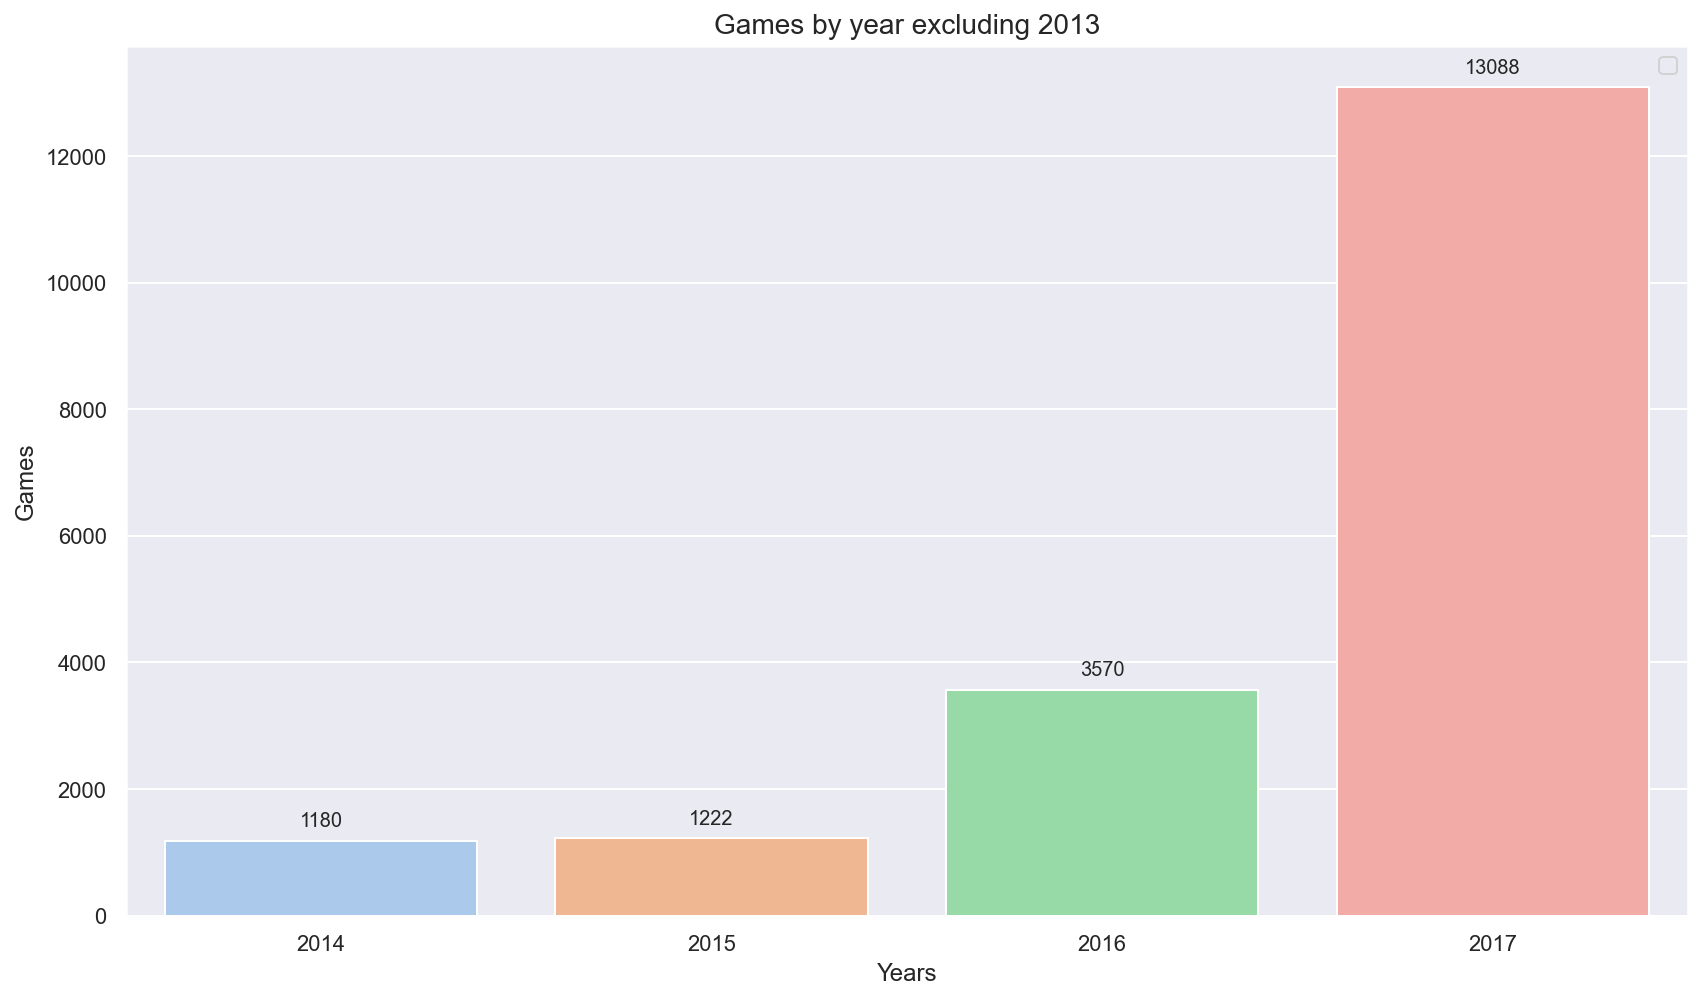

In [31]:
#BarPlot
#Create data for being plotted
ax = sns.barplot(x=df.groupby(df['created_at_year'])['id'].count()[1:].index, y=df.groupby(df['created_at_year'])['id'].count()[1:].values)
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Apply labels to every bar
ax.legend(handles, labels)
#Name the x - y axis
ax.set_ylabel('Games')
ax.set_xlabel('Years')
#Set the xticks (values of the column reponses) in horizontal
plt.xticks(rotation='horizontal')
#Set the title 
plt.title('Games by year excluding 2013', fontsize=14)
#apply fucntion to plot the bar labels
add_value_labels(ax, 'bar', spacing=5)
#Save Plot 
plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//games_by_year.png')
#Plot the barchart
plt.show()

### Game Duration |  created at - last move at

In [32]:
#Duration of the gamnes
df['game_duration']  = df['last_move_at']-df['created_at']

In [33]:
#Game duration in minutes 
df['game_duration'] = (df['game_duration'].dt.total_seconds()/60).round() #There are about 8000 matches with duration = 0.

In [34]:
df['game_duration'].describe()

count    19113.000000
mean        14.568880
std         82.144076
min          0.000000
25%          0.000000
50%          3.000000
75%         13.000000
max      10097.000000
Name: game_duration, dtype: float64

In [35]:
df['game_duration'].median() # Most of the Games last 3 minutes

3.0

In [36]:
# Modification of the incremental_code to get the max duration of the match. They will be used as bins to plot the Max duration of games
df['game_duration_bins'] = df['increment_code'].str.split('+').str[0] 

In [37]:
#Chage the Dtype of the columns to integuer
df['game_duration_bins'] = df['game_duration_bins'].astype('int32')

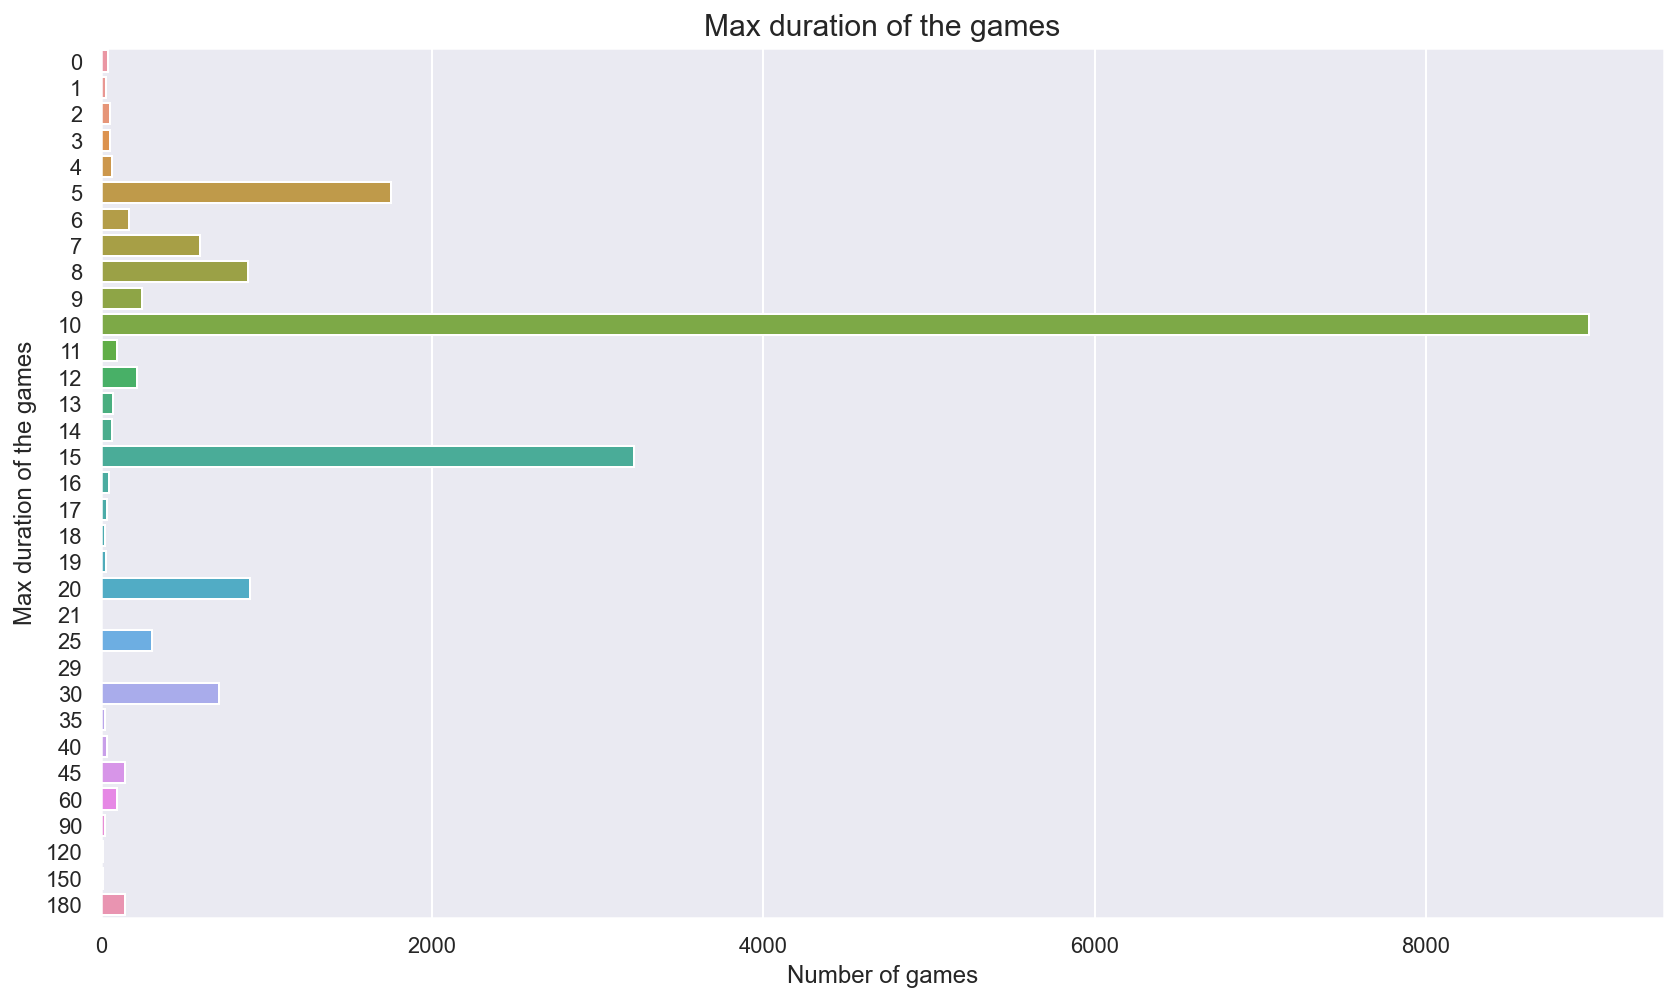

In [38]:
#Plot the Max Duration of Games 
ax = df.groupby(df['game_duration_bins'])['id'].count().reset_index().sort_values(by='game_duration_bins').set_index('game_duration_bins')
#Horizontal Barplot
sns.barplot(data=ax, y=ax.index, x=ax['id'].values, orient='h')
# x, y axis labels
plt.xlabel('Number of games')
plt.ylabel('Max duration of the games')
# Title of the Plot
plt.title('Max duration of the games', size=15)
#Save the plot 
plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//games_by_Max_duration.png')
#Plot the barchart
plt.show()


### Turns

In [39]:
#Describe Turns 
df['turns'].describe()

count    19113.000000
mean        60.513839
std         33.488264
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

In [77]:
#Group turns in Bins to plot them.
df['turns_bins'] = pd.cut(df['turns'], bins=20)

In [84]:
# Table to be plot- 
df['turns_bins'].value_counts().sort_index()

(0.652, 18.4]     1412
(18.4, 35.8]      3015
(35.8, 53.2]      4663
(53.2, 70.6]      3901
(70.6, 88.0]      2579
(88.0, 105.4]     1523
(105.4, 122.8]    1003
(122.8, 140.2]     559
(140.2, 157.6]     272
(157.6, 175.0]     124
(175.0, 192.4]      33
(192.4, 209.8]      18
(209.8, 227.2]       8
(227.2, 244.6]       0
(244.6, 262.0]       2
(262.0, 279.4]       0
(279.4, 296.8]       0
(296.8, 314.2]       0
(314.2, 331.6]       0
(331.6, 349.0]       1
Name: turns_bins, dtype: int64

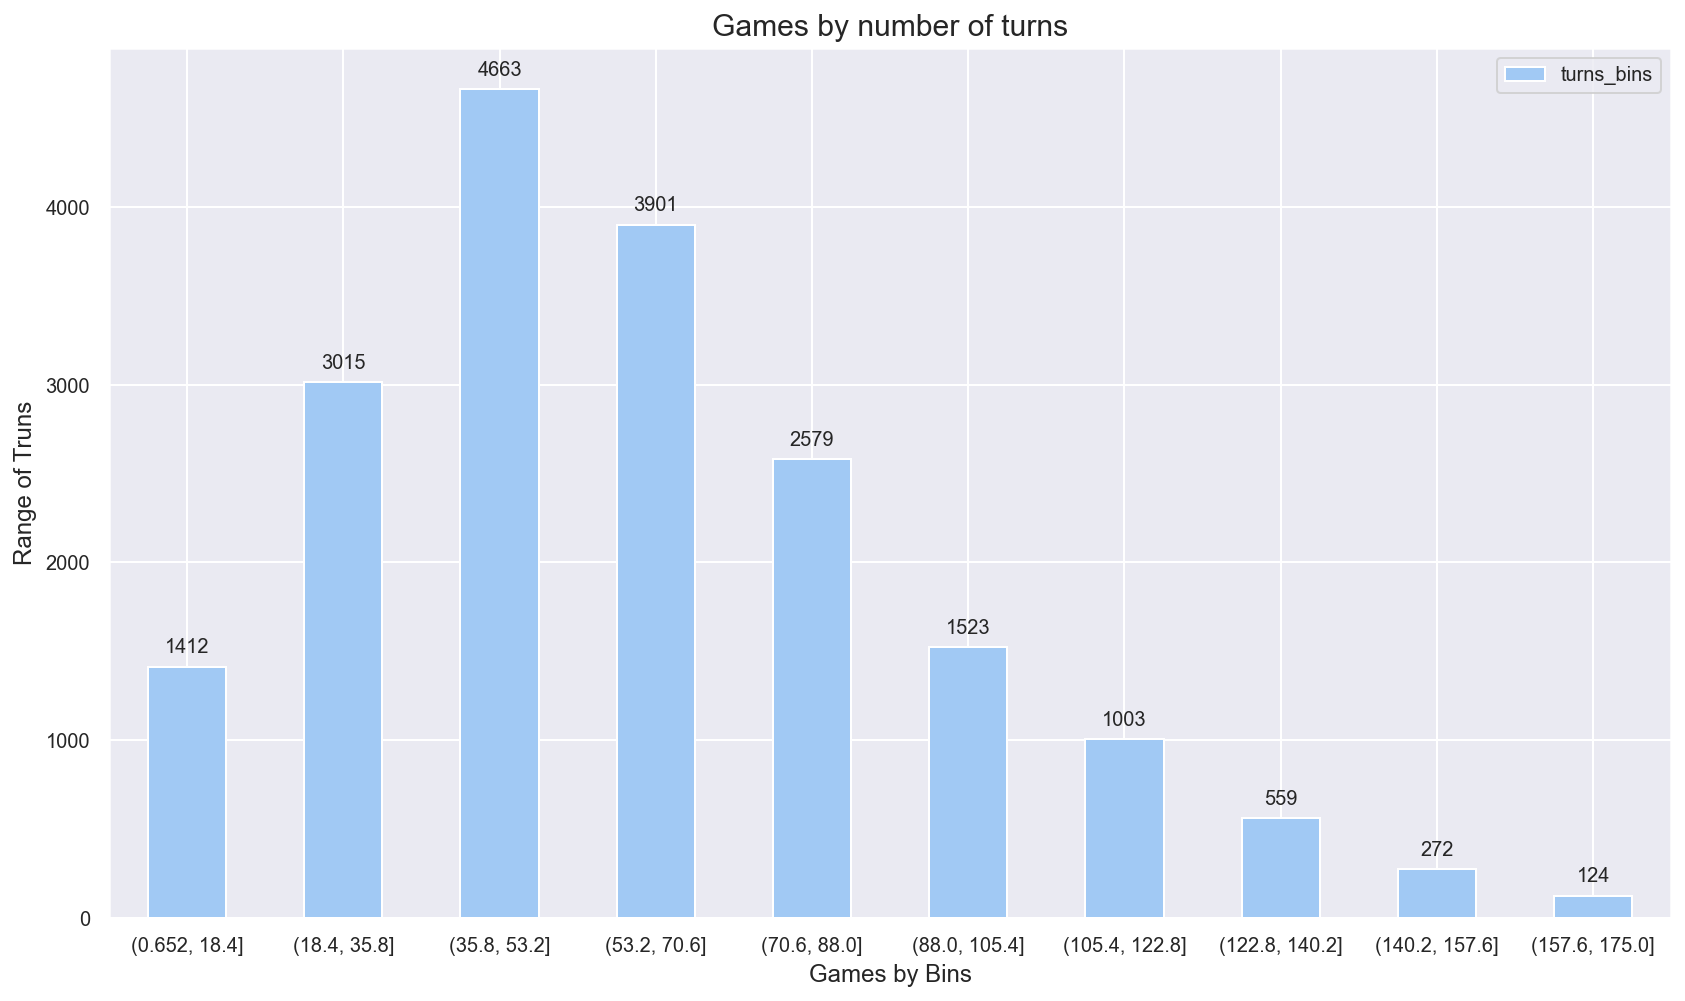

In [80]:
#Plot the Max Duration of Games 
ax = df['turns_bins'].value_counts().sort_index().head(10).plot(kind='bar')
#Horizontal Barplot
#Use the get_legend_handles_Labels function to get the labels value of the bars
handles, labels = ax.get_legend_handles_labels()
#Apply labels to every bar
ax.legend(labels, fontsize=10)
ax.tick_params(axis='x', rotation=0, labelsize=10)
ax.tick_params(axis='y', labelsize=10)
# x, y axis labels
plt.xlabel('Games by Bins')
plt.ylabel('Turns')
# Title of the Plot
plt.title('Games by number of turns', size=15)
add_value_labels(ax, 'bar', spacing=5)
#Save the plot 
plt.savefig(r'c:\\users\\ssai\\OneDrive\\Data_26-07\\Project_0_1\\Chess_aa_is\\plots//Turns_bins.png')
#Plot the barchart

plt.show()


### victory_status

<AxesSubplot:>

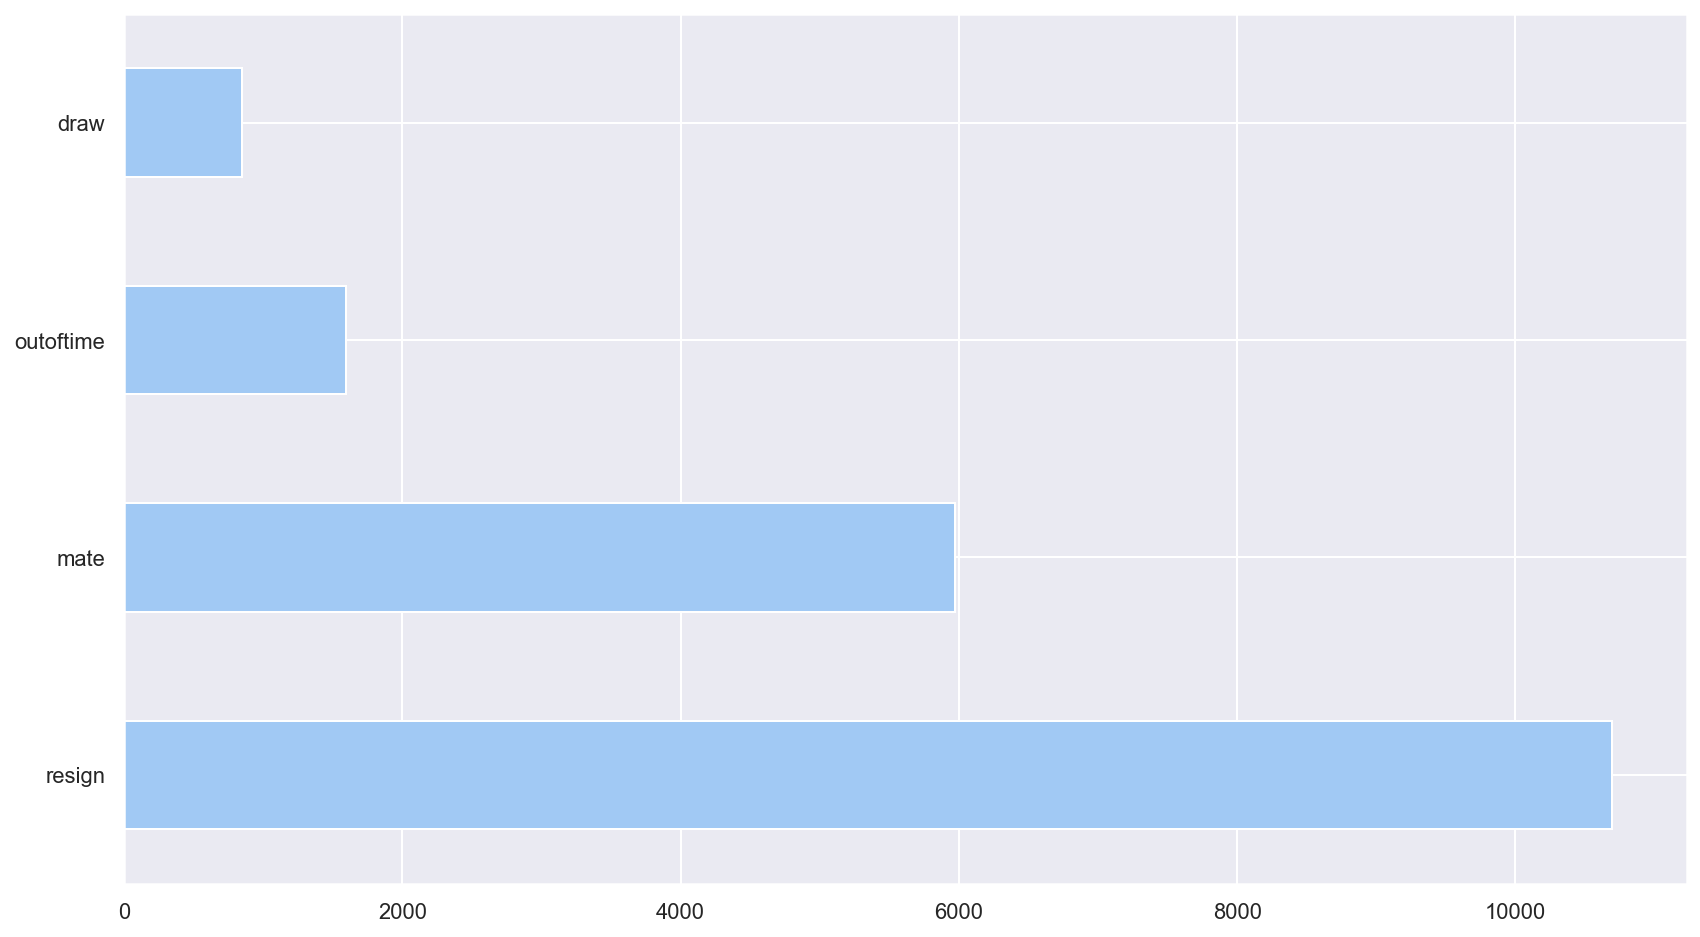

In [41]:
df['victory_status'].value_counts().plot(kind='barh')

### winner

In [42]:
# Target Feature
df['winner'].value_counts()

white    9545
black    8680
draw      888
Name: winner, dtype: int64

### white_id

In [43]:
#Number of unique values.
df['white_id'].nunique()

9438

In [44]:
#Top users 20 with white.

df['white_id'].value_counts().head(20)

ssf7               48
bleda              48
hassan1365416      44
khelil             41
1240100948         38
ozguragarr         38
ivanbus            36
vovkakuz           35
islam01            31
ozil17             30
trial-__gre        29
thebadfish         29
saeed65            28
tetley             27
lance5500          26
aaaaaaaddd         26
ranchowangdu       26
fandm-lancaster    26
kevchod            26
unrim              25
Name: white_id, dtype: int64

In [95]:
#Top winners with white
df.loc[df['winner'] == 'white'].groupby(df['white_id'])['id'].count().sort_values(ascending=False).head(20)

white_id
ssf7             29
hassan1365416    28
1240100948       22
ozil17           21
traced           21
ozguragarr       21
trial-__gre      20
khelil           20
lance5500        19
ranchowangdu     19
doraemon61       18
fabian1104       18
chesscarl        18
flafel26         18
ivanbus          18
elvis1997        17
dhernandez101    17
apis11           17
spiteknight      17
thebadfish       17
Name: id, dtype: int64

In [97]:
#Top winners with black
df.loc[df['winner'] == 'black'].groupby(df['white_id'])['id'].count().sort_values(ascending=False).head(20)

white_id
bleda               32
fandm-lancaster     22
chicago_chess       19
islam01             19
khelil              19
ssf7                18
marigw              18
jeffersondarcy1     17
viswannabe          17
nitsua49            17
vovkakuz            17
ozguragarr          17
aidenleahycrooks    17
thebestofthebad     16
ivanbus             16
dinobzik            16
kingcrazy99         16
zapala              16
anastasia2009       16
lodzianin           16
Name: id, dtype: int64

In [105]:
df.loc[df['white_id']=='ssf7'].sort_values(by='created_at')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,black_rating,moves,opening_eco,opening_name,opening_ply,created_at_year,game_duration,game_duration_bins,truns_bins,turns_bins
19203,hu1EtuvP,True,2017-08-27 06:54:16.719000064,2017-08-27 07:08:13.012999936,71,outoftime,white,8+0,ssf7,1914,...,1829,d4 e6 a3 d5 b4 Nf6 Nf3 Bd7 e3 Be7 Nbd2 O-O c4 ...,A40,Horwitz Defense,2,2017,14.0,8,"(70.6, 88.0]","(70.6, 88.0]"
19202,rsqlIzJ9,True,2017-08-27 07:15:25.846000128,2017-08-27 07:26:04.200000000,73,resign,white,8+0,ssf7,1922,...,1872,d4 d5 Nf3 Nf6 a3 Bg4 e3 c6 c4 e6 b4 a6 Bb2 Be7...,D02,Queen's Pawn Game: Symmetrical Variation,4,2017,11.0,8,"(70.6, 88.0]","(70.6, 88.0]"
19201,refuuxlq,True,2017-08-27 07:54:57.176000000,2017-08-27 08:10:03.476000000,76,mate,black,8+0,ssf7,1931,...,1977,d4 Nf6 Nf3 c5 e3 cxd4 exd4 d5 c4 dxc4 Bxc4 Bg4...,A46,Indian Game: Spielmann-Indian,4,2017,15.0,8,"(70.6, 88.0]","(70.6, 88.0]"
19200,2rmiVY7D,True,2017-08-27 08:44:51.456000000,2017-08-27 08:55:06.870000128,80,outoftime,black,8+0,ssf7,1922,...,1821,d4 d5 Nf3 g6 b4 Bg7 Bb2 Nc6 a3 a6 c4 e6 e3 Nf6...,D02,Queen's Pawn Game: Zukertort Variation,3,2017,10.0,8,"(70.6, 88.0]","(70.6, 88.0]"
19199,zfqxklpo,True,2017-08-27 08:59:44.515000064,2017-08-27 09:10:28.684000000,128,outoftime,black,8+0,ssf7,1909,...,1914,d4 c5 e3 Nf6 c3 cxd4 cxd4 g6 b4 d5 a3 Bg7 Bb2 ...,A43,Old Benoni Defense,2,2017,11.0,8,"(122.8, 140.2]","(122.8, 140.2]"
19198,7ooO85N5,True,2017-08-27 13:32:05.680000000,2017-08-27 13:46:17.172000000,77,outoftime,white,8+0,ssf7,1898,...,1881,d4 e6 a3 d5 b4 Nf6 Nf3 h6 e3 Bd6 Bb2 b6 Nbd2 O...,A40,Horwitz Defense,2,2017,14.0,8,"(70.6, 88.0]","(70.6, 88.0]"
19197,BmxCdEtU,True,2017-08-27 14:08:41.704999936,2017-08-27 14:23:22.457999872,75,mate,white,8+0,ssf7,1908,...,1862,d4 d5 Nf3 c6 e3 Nd7 c4 g6 b4 Bg7 Bb2 Ngf6 Nbd2...,D02,Queen's Pawn Game: Zukertort Variation,3,2017,15.0,8,"(70.6, 88.0]","(70.6, 88.0]"
19196,dLVncZp2,True,2017-08-27 15:00:53.512000000,2017-08-27 15:15:42.854000128,104,outoftime,black,8+0,ssf7,1917,...,1822,d4 Nc6 a3 d5 Nf3 Nf6 e3 Bf5 Nbd2 e6 b4 a6 c4 d...,A40,Mikenas Defense,2,2017,15.0,8,"(88.0, 105.4]","(88.0, 105.4]"
19195,jl6WYwGc,True,2017-08-27 15:26:52.079000064,2017-08-27 15:40:28.476000000,72,outoftime,black,8+0,ssf7,1906,...,1888,d4 f5 e3 Nf6 Be2 d5 Nf3 Nc6 a3 e6 b4 a6 c4 dxc...,A80,Dutch Defense,2,2017,14.0,8,"(70.6, 88.0]","(70.6, 88.0]"
19194,9QOq8kHI,True,2017-08-27 15:42:03.432000000,2017-08-27 15:52:54.480000000,81,resign,white,8+0,ssf7,1895,...,1899,d4 d5 Nf3 g6 b4 Bg7 Bb2 c6 e3 Bg4 h3 Bxf3 Qxf3...,D02,Queen's Pawn Game: Zukertort Variation,3,2017,11.0,8,"(70.6, 88.0]","(70.6, 88.0]"


### 